### Prelude: Regular expressions

- Now, explain in your own words: what are regular expressions?
It is a tool to match text patterns.

- Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use findall to show that your regex works on this test-text. Hint: a great place to test out regular expressions is: https://regex101.com.

- Provide an example of a regex to match words starting with "super". Show that it works on the test-text.

In [3]:
import re

# Example text
text = "Here are some numbers: 1234, 56789, 2345, 678."

# Regex to match exactly 4 digit numbers
pattern = r'\b\d{4}\b'

# Find all matches
matches = re.findall(pattern, text)
print(matches)  

['1234', '2345']


In [4]:
str2 = "Tousled try-hard blog Carles, typewriter fap hella salvia fanny pack selvage mlkshk crucifix. Next level retro quinoa post-ironic. Heirloom keffiyeh synth street art meggings, drinking vinegar Schlitz actually raw denim. 1234 Normcore freegan post-ironic meggings cred, cardigan yr locavore 3 wolf moon. Bitters ennui ugh superpolaroid, artisan scenester distillery kale chips wolf pork belly keffiyeh. Actually Tumblr twee [[drinking vinegar]], squid pickled cronut banh mi taxidermy deep v 8-bit narwhal Odd Future. Sriracha bicycle rights listicle, keffiyeh typewriter authentic selvage cred selfies. \n Ugh lo-fi tattooed chambray, DIY Marfa banh mi whatever narwhal jean shorts photo booth keytar listicle. Chambray Truffaut cardigan skateboard, hashtag disrupt next level. Normcore Blue Bottle yr, Odd Future skateboard chillwave iPhone slow-carb sriracha letterpress meditation cronut. IPhone fashion axe Neutra fingerstache tofu gluten-free [[gentrify]], wolf before they sold out pork belly retro Vice skateboard DIY Marfa. Mustache supertaxidermy cliche 9999 fashion axe Pitchfork, iPhone cred literally McSweeney's normcore. Health goth meggings skateboard 90's 3 wolf moon, PBR&B kale chips biodiesel fashion axe. Sartorial crucifix retro, four dollar toast kogi forage swag deep v wayfarers tilde. \n Synth typewriter messenger bag health goth scenester pour-over. Pour-over Truffaut 90's fashion axe post-ironic, Portland Wes Anderson forage occupy sartorial gentrify hashtag beard kitsch quinoa. Occupy [[hashtag]] street art 3 wolf moon, Echo Park quinoa Tumblr Pitchfork fanny pack High Life. Helvetica banjo gentrify authentic mumblecore, tote bag blog. Scenester +1 American Apparel organic literally, Intelligentsia butcher bitters. Seitan lumbersexual fanny pack organic, letterpress umami ethical wayfarers. Cronut biodiesel Wes Anderson, jean shorts lo-fi keffiyeh Carles. \n Bushwick health goth chambray gluten-free distillery. Keytar selvage Shoreditch, seitan YOLO tote bag listicle Marfa farm-to-table keffiyeh meditation tilde. Narwhal freegan meditation, Pitchfork XOXO Brooklyn 23456 whatever photo booth pork belly Blue Bottle gluten-free. Semiotics fashion axe 3 wolf moon, selfies brunch skateboard shabby chic organic wayfarers yr whatever kitsch Thundercats tilde bespoke. [[Bicycle|Bicycle(two-wheeled type)]] rights seitan mlkshk Marfa, church-key cray mustache sartorial banh mi food truck chillwave Echo Park bitters. Craft superbeer bespoke street art, slow-carb pop-up Kickstarter typewriter Etsy try-hard [[Pitchfork|Pitchfork Magazine]] aesthetic keytar Tumblr. 8-bit bitters fanny pack, Portland Odd Future yr selvage crucifix narwhal polaroid sriracha Thundercats."

# Regex to match exactly 4 digit numbers
pattern = r'\bsuper\w*\b'
# Find all matches
matches = re.findall(pattern, str2)
print(matches)





['superpolaroid', 'supertaxidermy', 'superbeer']


#### Regular expressions round 2. 
Show that you can extract the wiki-links from the test-text. Perhaps you can find inspiration on stack overflow or similar. Hint: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.

In [5]:
# Regex to match wiki-links in str2

pattern = r'\[\[(.*?)\]\]'

# Find mathes 
matches = re.findall(pattern, str2)
print(matches)


['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle|Bicycle(two-wheeled type)', 'Pitchfork|Pitchfork Magazine']


## Part 1: Download the Wikipedia pages of characters

Exercise

Go to the page https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers and extract all of the artist-links using your regular expressions from above.
Hint: To make this easier, you can simply hit the edit button on wikipedia, copy the entire content of the file to a plain text file on your computer and manually delete all of the markup that's not related to the artists' names. (Otherwise there are some wiki-links there that you don't want)


In [6]:
# load the List_of_mainstream_rock_performers.txt file
with open('List_of_mainstream_rock_performers.txt', 'r') as file:
    data = file.read()

# Regex to match wiki-links in data
pattern = r'\[\[(.*?)\]\]'
# Find mathes
matches = re.findall(pattern, data)

bands = matches
print(f'There are {len(bands)} bands in the list.')

There are 489 bands in the list.


#### Back to our regularly scheduled programming
With the list from the exercise above, you now have all of the nodes in the network.

Exercise

- Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers.
    - Hint 0: Make sure you read the Wiki API pages to ensure that your download the cleanest possible version of the page (the wikitext). This link may be helpful.
    - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
    - Hint 2: If you now have a directory with all those files, you can use os.listdir() to list all the files in that directory within Python and iterate over the files if you need to.
    - Hint 3: Don't forget to add underscores to the performer names when you construct the urls

In [7]:
'''- Use your knowledge of APIs and the list of all the wiki-pages to download all the text on the pages of the country performers.
    - Hint 0: Make sure you read the Wiki API pages to ensure that your download the cleanest possible version of the page (the wikitext). This link may be helpful.
    - Hint 1: You may want to save the individual band/artist pages on your computer. You can use your skills from the first lectures to write them as plain-text files (that's what I would do - one file per band/artist, named according to its wiki-link). (But you can also use pickle files or start a database if you like that better.)
    - Hint 2: If you now have a directory with all those files, you can use os.listdir() to list all the files in that directory within Python and iterate over the files if you need to.
    - Hint 3: Don't forget to add underscores to the performer names when you construct the urls.'''

import requests
url = 'https://en.wikipedia.org/wiki/List_of_mainstream_rock_performers'
headers = {'User-Agent': 'Mozilla/5.0'} # just use this dict as-is.
response = requests.get(url, headers=headers)
print(f'Status code: {response.status_code}')

Status code: 200


In [8]:
baseurl = "https://en.wikipedia.org/w/api.php?"
# Define parameters for the API request
#action=query&prop=revisions&rvprop=content&format=json&titles=Anarchism&rvslots=main
action = "action=query"
title = "titles=List_of_mainstream_rock_performers"
#redirects ="prop=redirects&rdprop=title"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"


query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
print(query)

https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&titles=List_of_mainstream_rock_performers&format=json


In [9]:
wikiheader = {'User-Agent': 'Mozilla/5.0'}
wikidata = requests.get(query, headers=headers)
wikitext = wikidata.text
print(wikitext)

{"batchcomplete":"","warnings":{"main":{"*":"Subscribe to the mediawiki-api-announce mailing list at <https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/> for notice of API deprecations and breaking changes. Use [[Special:ApiFeatureUsage]] to see usage of deprecated features by your application."},"revisions":{"*":"Because \"rvslots\" was not specified, a legacy format has been used for the output. This format is deprecated, and in the future the new format will always be used."}},"query":{"normalized":[{"from":"List_of_mainstream_rock_performers","to":"List of mainstream rock performers"}],"pages":{"68324070":{"pageid":68324070,"ns":0,"title":"List of mainstream rock performers","revisions":[{"contentformat":"text/x-wiki","contentmodel":"wikitext","*":"{{short description|None}}\n\nThis is an alphabetical '''list of mainstream rock performers''' spanning all subgenres and fusions within the genre of [[rock music]].  Artists included are known for cr

In [10]:
# Extracted the bandnames used in the wiki links. 

# replace the spaces in band names with underscores and store in new list
bands_underscored = [band.replace(" ", "_") for band in bands]
# Remove all "|" and anything after it in band names and store in new list
bands_cleaned = [band.split('|')[0] for band in bands_underscored]
print(bands_cleaned)

# function to sanitize filenames, so that they can be used as valid filenames
def sanitize_filename(name):
    # Replace any character that is not a letter, number, underscore, or hyphen with an underscore
    return re.sub(r'[^\w\-]', '_', name)

# iterate over the cleaned band names and download the wikitext for each band
for band in bands_cleaned:
    band_url = f"https://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&format=json&titles={band}&rvslots=main"
    band_data = requests.get(band_url, headers=wikiheader)
    band_text = band_data.text
    safe_name = sanitize_filename(band)
    # save the wikitext to a file named after the band
    with open(f"{safe_name}.txt", "w", encoding='utf-8') as file:
        file.write(band_text)


['10cc', '10_Years_(band)', '3_Doors_Down', '311_(band)', '38_Special_(band)', 'ABBA', 'Accept_(band)', 'AC/DC', 'Bryan_Adams', 'Aerosmith', 'AFI_(band)', 'Air_Supply', 'The_Alan_Parsons_Project', 'Alice_in_Chains', 'The_All-American_Rejects', 'The_Allman_Brothers_Band', 'Alter_Bridge', 'Ambrosia_(band)', 'America_(band)', 'The_Animals', 'Adam_Ant', 'Anthrax_(American_band)', 'April_Wine', 'Arcade_Fire', 'Arctic_Monkeys', 'Asia_(band)', 'Audioslave', 'Avenged_Sevenfold', 'Awolnation', "The_B-52's", 'Bachman–Turner_Overdrive', 'Bad_Company', 'Badfinger', 'The_Band', 'The_Bangles', 'Barenaked_Ladies', 'Bay_City_Rollers', 'The_Beach_Boys', 'Beastie_Boys', 'The_Beatles', 'Bee_Gees', 'Beck', 'Ben_Folds_Five', 'Pat_Benatar', 'Chuck_Berry', 'The_Big_Bopper', 'Billy_Talent', 'The_Black_Crowes', 'The_Black_Keys', 'Black_Sabbath', 'Black_Stone_Cherry', 'Black_Veil_Brides', 'Blink-182', 'Blondie_(band)', 'Bloodhound_Gang', 'Blue_October', 'Blue_Öyster_Cult', 'Blues_Traveler', 'James_Blunt', 'Blur

## Part 2: Building the networks

Now, we're going to build a single NetworkX directed graph with all the rock performers. (We are analyzing a network of bands/artists/perfomers. I'll use all of those interchangably below).

The nodes in the network will be all the performers, and we will place an edge between nodes  A
  and  B if the Wikipedia page of node  A links to the Wikipedia page of node  B.

The overall plan of attack for this is the following:

- Take the pages you have downloaded for each performer.
- Each page corresponds to a performer (= a node in your network).
- Find all the links in a performers page that link to another node of the network (= some other performer).
- There are many ways to do this, but below, I've tried to break it down into natural steps.

#### Exercise: Build the network of Rock Performers

Now we can build the network. Here are the instructions.

- Use a regular expression to extract all outgoing links from each of the pages you downloaded above.
  - Start by making a single page work. Do some debugging to make sure it's actually working.
  - Then slowly build the loops over performers/pages to take your little operation to industrial scale
  - You don't have to be perfect. There will be tricky edge-cases, you don't have to solve all of those. The key is to get a pretty good network to work with, not to make everything perfect.
- For each link you extract, check if the target is a person from your list of performers. If yes, keep it. If no, discard it.
- Use a NetworkX DiGraph to store the network.
- Store the length of the content as an attribute of the node (i.e. count the number of words you have in each character's page). By storing this information as a nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use regex, but simpler methods are OK.
- When have you finished, you'll notice that some nodes do not have any out- and in- degrees. Unless you've made a mistake, those are truly isolated bands/singers. Double check for mistakes, then discard those disconnected nodes from the network.
- Finally, extract the largest component - it will make our work with visualisations much easier (note: removing isolated nodes (with no links) does not guarantee that you are left with the largest component).
  - Note 1: For directed graphs use weakly connected component to extract the largest component. You can also check the hints on how to extract the largest component of a graph from Week 1 notebook.
  - Note 2: Further analysis is done with the largest component.

In [11]:
import networkx as nx
G = nx.DiGraph()

# Add nodes for each band
for band in bands_cleaned:
    G.add_node(band)

# Find and add edges if a band page links to another band (using regex to find links in the text files)
for band in bands_cleaned:
    safe_name = sanitize_filename(band)
    with open(f"{safe_name}.txt", "r", encoding='utf-8') as file:
        band_text = file.read()

        # Count number of words in band_text using regex and add as node attribute
        word_count = len(re.findall(r'\b\w+\b', band_text))
        G.nodes[band]['word_count'] = word_count

        # Find all wiki-links in the band text
        links = re.findall(r'\[\[(.*?)\]\]', band_text)
        # Clean the links to match band names
        cleaned_links = [link.split('|')[0].replace(" ", "_") for link in links]
        cleaned_links = [link for link in cleaned_links if link in bands_cleaned]
        # add directed edges from band to other bands it links to
        for other_band in cleaned_links:
            if other_band != band:
                G.add_edge(band, other_band)

In [12]:
# print edges of G
print(G.edges())
print(f'There are {len(G.edges())} edges in the graph.')

[('10cc', 'AllMusic'), ('10cc', 'The_Yardbirds'), ('10cc', 'Simon_&_Garfunkel'), ('10cc', 'The_Hollies'), ('10cc', "Herman's_Hermits"), ('10cc', 'Frank_Zappa'), ('10cc', 'Queen_(band)'), ('10cc', 'Roxy_Music'), ('10cc', 'George_Harrison'), ('10cc', 'Asia_(band)'), ('10cc', 'The_Police'), ('10cc', 'Duran_Duran'), ('10cc', 'Peter_Gabriel'), ('10cc', 'The_Clash'), ('10cc', 'Jethro_Tull_(band)'), ('10cc', 'Ramones'), ('10cc', 'Paul_McCartney'), ('10cc', 'Ringo_Starr'), ('10cc', 'ABBA'), ('10cc', 'Steely_Dan'), ('10cc', 'Toto_(band)'), ('10cc', 'Electric_Light_Orchestra'), ('10_Years_(band)', 'Disturbed_(band)'), ('10_Years_(band)', 'Breaking_Benjamin'), ('10_Years_(band)', 'Mudvayne'), ('10_Years_(band)', 'Korn'), ('10_Years_(band)', 'Deftones'), ('10_Years_(band)', 'Stone_Temple_Pilots'), ('10_Years_(band)', 'Thousand_Foot_Krutch'), ('10_Years_(band)', 'Linkin_Park'), ('10_Years_(band)', 'Shinedown'), ('10_Years_(band)', 'Puddle_of_Mudd'), ('10_Years_(band)', 'AllMusic'), ('3_Doors_Down',

In [13]:
# find all nodes with out degree 0 (no outgoing edges)
out_degree_zero = [node for node, out_degree in G.out_degree() if out_degree == 0]
print(f'There are {len(out_degree_zero)} nodes with out degree 0.')

# discard degree 0 nodes
G.remove_nodes_from(out_degree_zero)
print(f'There are {len(G.nodes())} nodes in the graph after removing out degree 0 nodes.')

# extract largest component using weakly connected components
largest_cc = max(nx.weakly_connected_components(G), key=len)
G_lc = G.subgraph(largest_cc).copy()
print(f'There are {len(G_lc.nodes())} nodes in the largest component.')

There are 16 nodes with out degree 0.
There are 473 nodes in the graph after removing out degree 0 nodes.
There are 473 nodes in the largest component.


#### Excercise:

Document how you crawled the network.
- First, simply describe the steps of the process (what you did, step by step)
    1. Copied the text from the wikipage containing all the bands and made it a text file. 
    2. From this textfile, i extracted all the wiki-links to bands and saved them in an array.
    3. Then i looped over the array of bands and downloaded all the wikipages of each band (making sure that i used the right url for them, adding underscores and removing characters) 
    4. Now, making a directed graph, containing the bands as nodes.
    5. Lastly, looping through each page of the bands, adding an edge to an other band, if it is linked on the page. This i did by finding all links on the page, then making a new array of only bands that are nodes in the graph and lastly adding edges from the band to all bands in the new array.
- Then, write a short section about which part of the process that was most difficult.

    It was definitly difficult to figure out the technical part of extracting all the wikipedia pages. As, soon as they were downloaded and i figure out how to access them, the work flow was better and more intuitive.
- Next write a short section about how you used LLMs to help you.

    I used the LLM a lot to help me figure out what smart package attributes that could help me and how they work. I specially used it when trying to figure out how i could clean up the names of the bands, to use them in the url and when making filenames.  
- Finally, compose a short section about what you would do differently if you had to do it again.

    If i had to do it again, I would figure out a way to check if i got all i needed from the wikipedia pages and try to make them more readable, when saved as a .txt file.
    Furthermore i would try without using the help of the LLM's, to test if I understood everything of the parts it helped me create.

### Exercise: Simple network statistics and analysis

- What is the number of nodes in the network?

- More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)

- Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
    - Compare the out-degree distribution to a random network with the same number of nodes and links.
    - Compare the in-degree distribution to a scale-free network with the same number of nodes.
- Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?
- What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?

In [14]:
# Number of nodes and edges in the largest component
print(f'The largest component has {len(G_lc.nodes())} nodes and {len(G_lc.edges())} edges.')

The largest component has 473 nodes and 7448 edges.


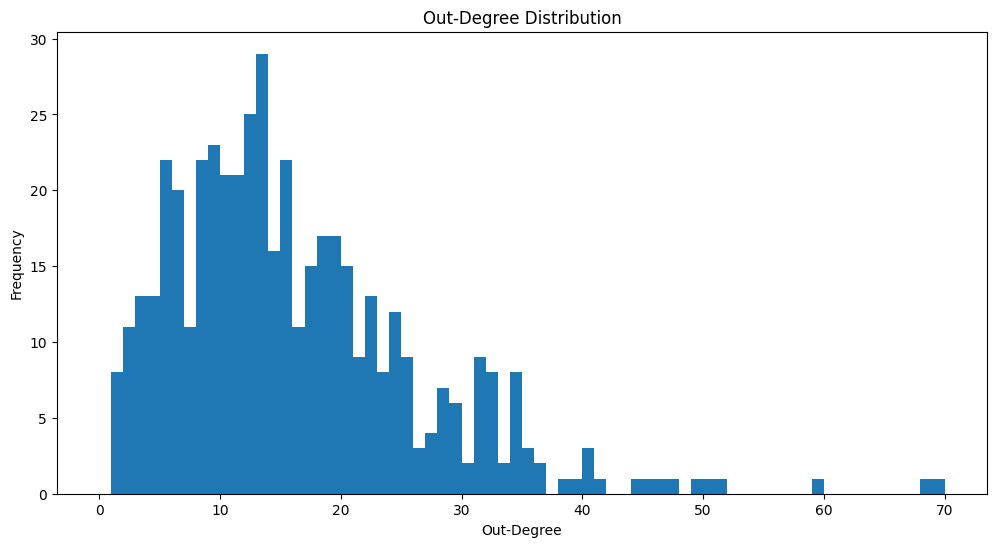

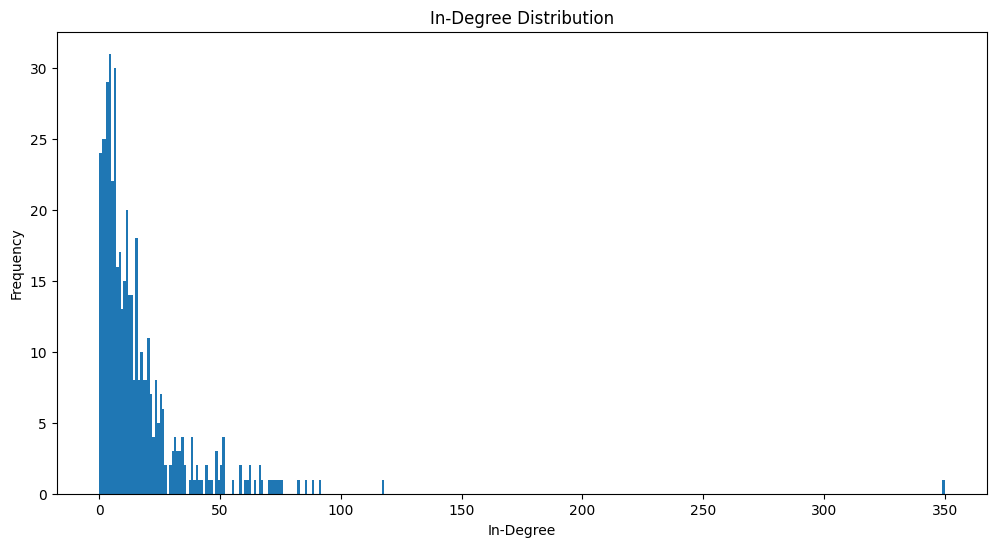

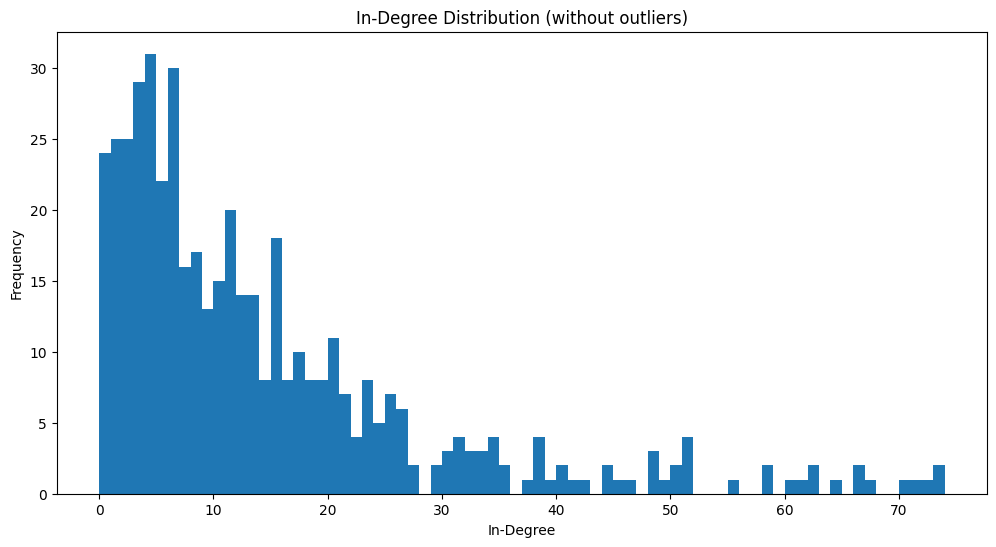

In [24]:
# Outdegree distribution
import matplotlib.pyplot as plt

# out degrees of all nodes in G_lc
out_degrees = [d for n, d in G_lc.out_degree()]

# in degrees of all nodes in G_lc
in_degrees = [d for n, d in G_lc.in_degree()]

# plot histograms of out degrees and in degrees 
plt.figure(figsize=(12, 6))
plt.hist(out_degrees, bins=range(max(out_degrees)+1))
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

plt.figure(figsize=(12, 6))
plt.hist(in_degrees, bins=range(max(in_degrees)+1))
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.show()

# plot in degree without outliers (in degree < 75)
plt.figure(figsize=(12, 6))
plt.hist([d for d in in_degrees if d < 75], bins=range(75))
plt.title('In-Degree Distribution (without outliers)')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.show()

In the plots above, we observe that there is a big difference in the out and in degree. There is especially one band, that a lot of other bands (around 350) link to. This does make sense though, as there definitly are many bands that are more likely to link to, perhabs because they are more known and/or have being active for long. Furthermore none of the bands are not in the same caliber heavily linking to others. 

The in degree distribution is heavily skewed to the left and the out degree is slightly skewed to the left.

There are more nodes with low in degree, than nodes with low out degree. Which means that many link to more than one other band, while many are not linked to by other bands or only by few.



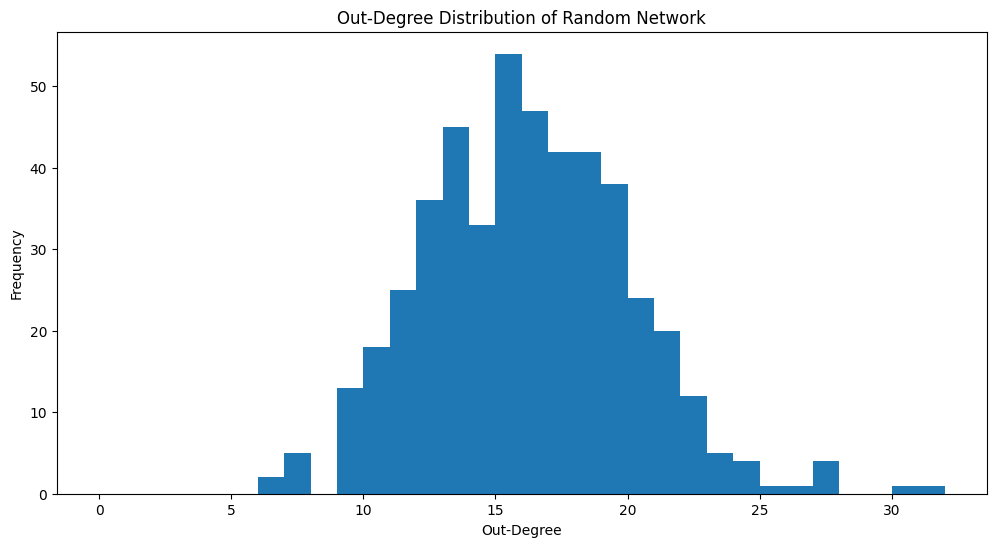

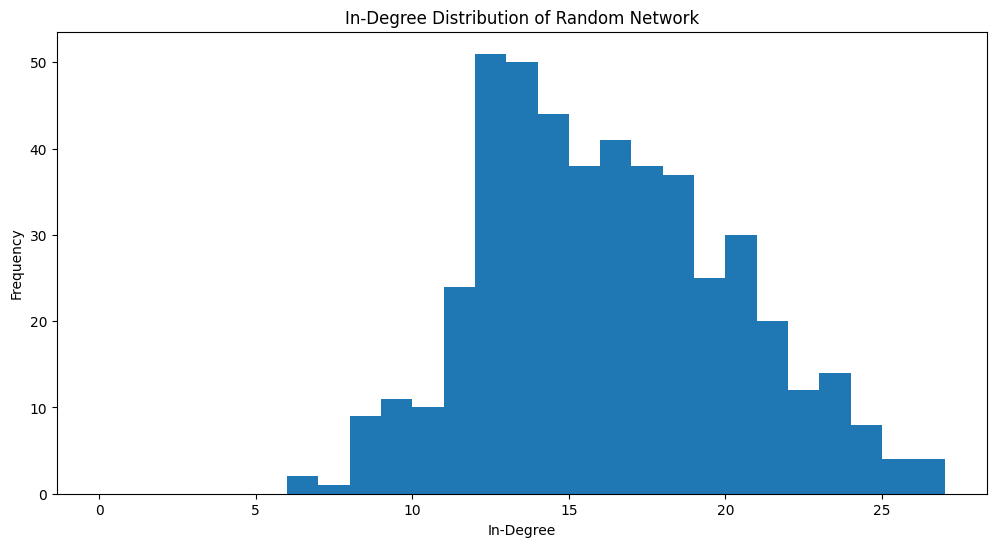

In [ ]:
# Random network with same number of nodes and edges as G_lc
num_nodes = len(G_lc.nodes())
num_edges = len(G_lc.edges())
G_random = nx.gnm_random_graph(num_nodes, num_edges, directed=True, seed=1234)

random_out_degrees = [d for n, d in G_random.out_degree()]
random_in_degrees = [d for n, d in G_random.in_degree()]

# Plot out degree distribution of random network
plt.figure(figsize=(12, 6))
plt.hist(random_out_degrees, bins=range(max(random_out_degrees)+1))
plt.title('Out-Degree Distribution of Random Network')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.show()

# Plot in degree distribution of random network
plt.figure(figsize=(12, 6))
plt.hist(random_in_degrees, bins=range(max(random_in_degrees)+1))
plt.title('In-Degree Distribution of Random Network')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.show()

The out and in degrees of the random network looks very different from the real network of the bands. These random network degree distributions look way more normal distributed. There is no outliers of the in degrees. None of the nodes are, not linked to.

##### Scale free network using scale_free_graph (Bollobás model)

Meaning of the parameters

α (alpha): Controls how often new nodes attach to old nodes with preferential attachment.

β (beta): Controls how often edges are formed between already existing nodes (rich–rich connections).

γ (gamma): Controls how often new nodes attach without preferential attachment (uniform random choice).

They must sum to 1.

The scale-free network has 1056 edges.


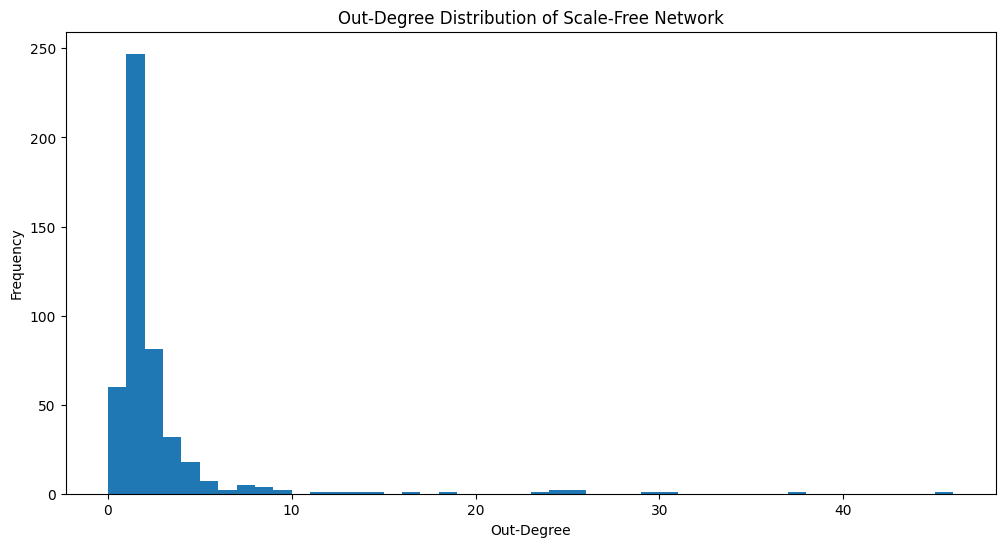

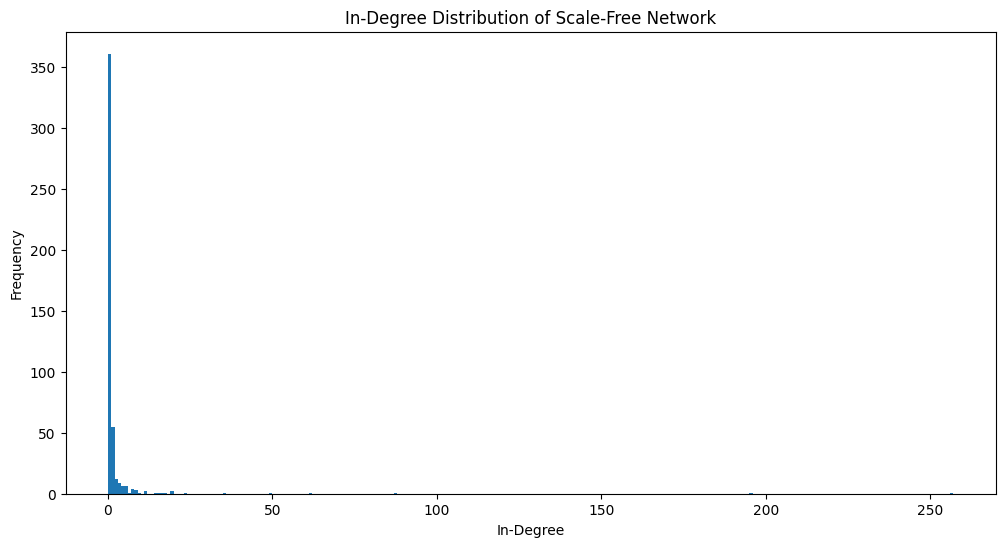

In [46]:
# Scale-free network with same number of nodes as G_lc
# Bollobás model for directed scale-free graphs

# Parameters for the scale-free graph
#a = 0.20  # Probability of adding a new node with an edge to an existing node with preferential attachment
#b = 0.30  # Probability of adding a new edge between existing nodes with preferential attachment
#g = 0.50  # Probability of adding a new node with an edge to an existing node without preferential attachment

G_scale_free = nx.scale_free_graph(num_nodes, seed=1234)
scale_free_out_degrees = [d for n, d in G_scale_free.out_degree()]
scale_free_in_degrees = [d for n, d in G_scale_free.in_degree()]

# number of edges in scale-free network
print(f'The scale-free network has {len(G_scale_free.edges())} edges.')

# Plot out degree distribution of scale-free network
plt.figure(figsize=(12, 6))
plt.hist(scale_free_out_degrees, bins=range(max(scale_free_out_degrees)+1))
plt.title('Out-Degree Distribution of Scale-Free Network')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.show()
# Plot in degree distribution of scale-free network
plt.figure(figsize=(12, 6))
plt.hist(scale_free_in_degrees, bins=range(max(scale_free_in_degrees)+1))
plt.title('In-Degree Distribution of Scale-Free Network')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.show()

The out and in degrees of the scale free network looks very different from the real network of the bands. These scale free network degree distributions look way more skewed, though in the right direction (left). There are outliers of the in degrees. Too many of the nodes are, not linked to. Also there are way too little connections in the network. 

In [47]:
# the top 5 most connected bands 

# 5 max in-degrees
top_in_degrees = sorted(G_lc.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by in-degree:")
for node, degree in top_in_degrees:
    print(f"{node}: {degree}")

# 5 max out-degrees
top_out_degrees = sorted(G_lc.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\n Top 5 nodes by out-degree:")
for node, degree in top_out_degrees:
    print(f"{node}: {degree}")

Top 5 nodes by in-degree:
AllMusic: 350
Led_Zeppelin: 117
Bob_Dylan: 91
Queen_(band): 88
Metallica: 85

 Top 5 nodes by out-degree:
Alice_in_Chains: 70
Deep_Purple: 68
Black_Sabbath: 59
Def_Leppard: 51
Guns_N'_Roses: 50


This is what i expected, all very known bands. Therefore often linked to. They probably have quiet thouroughly made pages, that are long and link to others.

In [52]:
# What are the 10 pages with the longest wiki entries? 
top_word_counts = sorted(G_lc.nodes(data=True), key=lambda x: x[1]['word_count'], reverse=True)[:10]
print("\nTop 10 pages with the longest wiki entries:")
for node, data in top_word_counts:
    print(f"{node}: {data['word_count']} words")



Top 10 pages with the longest wiki entries:
Guns_N'_Roses: 61448 words
Coldplay: 47558 words
Queen_(band): 46900 words
Marilyn_Manson_(band): 46611 words
The_Rolling_Stones: 44638 words
U2: 43605 words
Paul_McCartney: 43546 words
Bob_Dylan: 43185 words
David_Bowie: 43032 words
Elton_John: 41876 words


# Part 3: Visualizing the networks

Exercise: Let's build a simple visualization of the network

- For the sake of the visualisation, let's convert our network to undirected graph (tip: There is a NetworkX command to help you).
Note: Keep the directed graph, we will use it in the following exercises.

- Use the NetworkX command nx.spring_layout or nx.draw_kamada_kawai to draw the resulting undirected network. (You can find background on the algorithms here.)

- Set up your plot so that node-size depends on the node degree.

- Make the node color depend on the length of content attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)

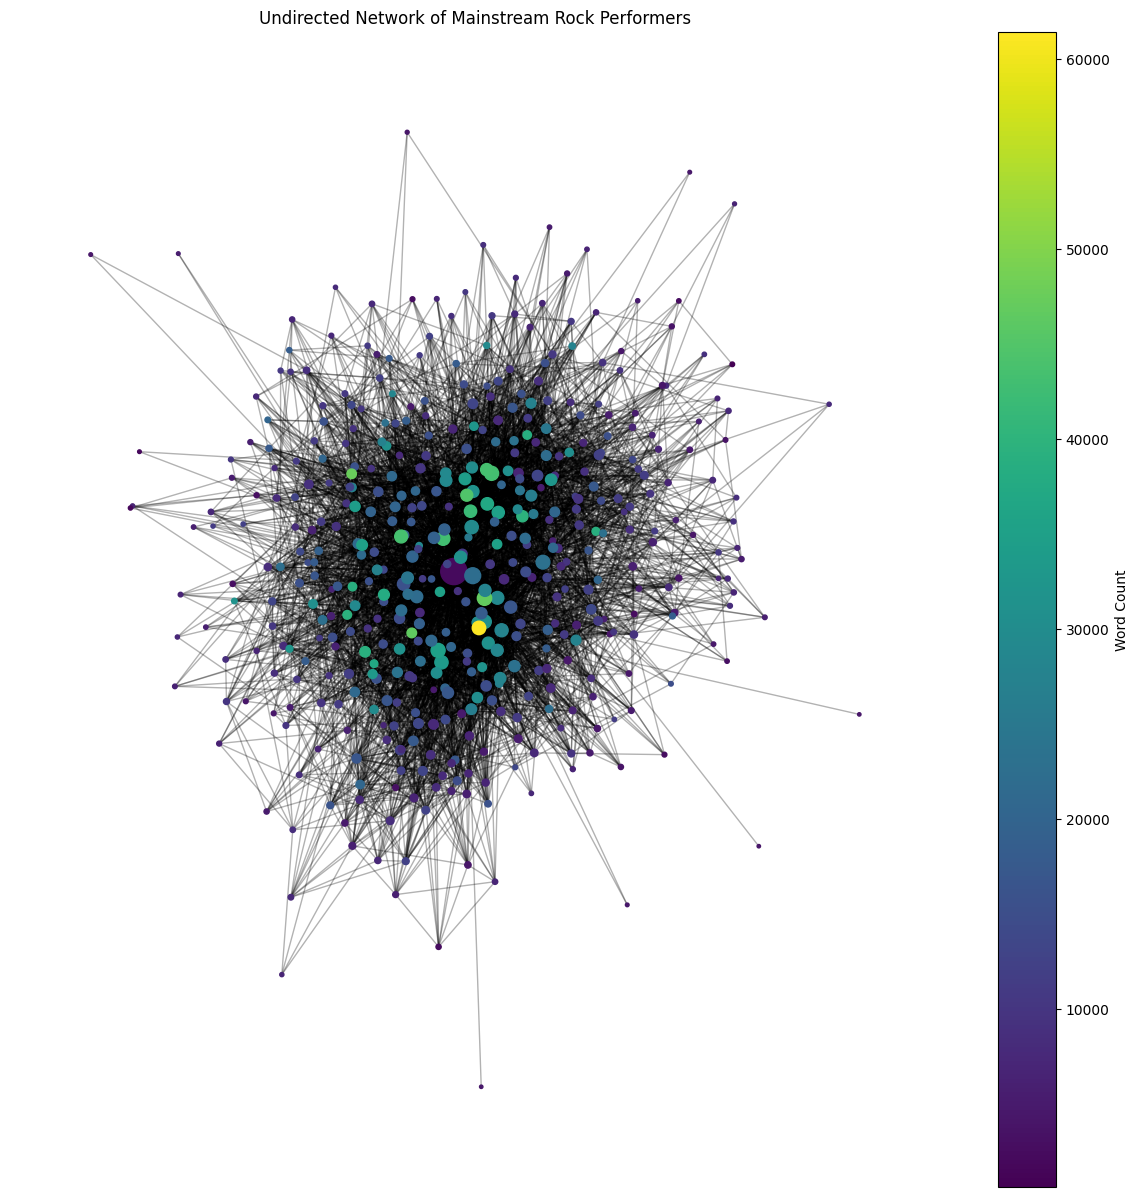

In [54]:
# make a simple visualization of the network
# convert directed graph to undirected graph
G_undirected = G_lc.to_undirected()

# plot the undirected graph using spring layout
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G_undirected, seed=42)  # positions for all
# node sizes based on degree
node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]
# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()